In [1]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import copy
import numpy as np
import matplotlib.pyplot as plt
import re

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [4]:
print('percentage of NA in each columns')
df.isna().sum()/df.shape[0]*100

percentage of NA in each columns


PassengerId     0.000000
HomePlanet      2.312205
CryoSleep       2.496261
Cabin           2.289198
Destination     2.093639
Age             2.059128
VIP             2.335212
RoomService     2.082135
FoodCourt       2.105142
ShoppingMall    2.392730
Spa             2.105142
VRDeck          2.162660
Name            2.300702
Transported     0.000000
dtype: float64

In [5]:
for item in df.columns:
    print(f'{item} :',df[item].unique(), f', #{len(df[item].unique())}' )

PassengerId : ['0001_01' '0002_01' '0003_01' ... '9279_01' '9280_01' '9280_02'] , #8693
HomePlanet : ['Europa' 'Earth' 'Mars' nan] , #4
CryoSleep : [False True nan] , #3
Cabin : ['B/0/P' 'F/0/S' 'A/0/S' ... 'G/1499/S' 'G/1500/S' 'E/608/S'] , #6561
Destination : ['TRAPPIST-1e' 'PSO J318.5-22' '55 Cancri e' nan] , #4
Age : [39. 24. 58. 33. 16. 44. 26. 28. 35. 14. 34. 45. 32. 48. 31. 27.  0.  1.
 49. 29. 10.  7. 21. 62. 15. 43. 47.  2. 20. 23. 30. 17. 55.  4. 19. 56.
 nan 25. 38. 36. 22. 18. 42. 37. 13.  8. 40.  3. 54.  9.  6. 64. 67. 61.
 50. 41. 57. 11. 52. 51. 46. 60. 63. 59.  5. 79. 68. 74. 12. 53. 65. 71.
 75. 70. 76. 78. 73. 66. 69. 72. 77.] , #81
VIP : [False True nan] , #3
RoomService : [   0.  109.   43. ... 1569. 8586.  745.] , #1274
FoodCourt : [   0.    9. 3576. ... 3208. 6819. 4688.] , #1508
ShoppingMall : [   0.   25.  371. ... 1085.  510. 1872.] , #1116
Spa : [   0.  549. 6715. ... 2868. 1107. 1643.] , #1328
VRDeck : [   0.   44.   49. ... 1164.  971. 3235.] , #1307
Name : 

In [6]:
df['PassengerId_prefix'] = df['PassengerId'].apply(lambda x: x.split('_')[0])
df['PassengerId_suffix'] = df['PassengerId'].apply(lambda x: x.split('_')[1])
df['Cabin_1'] = df['Cabin'].apply(lambda x: str(x).split('/')[0] if bool(re.search('[A-Za-z]/[0-9]+/[A-Za-z]', str(x))) else x)
df['Cabin_2'] = df['Cabin'].apply(lambda x: str(x).split('/')[1] if bool(re.search('[A-Za-z]/[0-9]+/[A-Za-z]', str(x))) else x)
df['Cabin_3'] = df['Cabin'].apply(lambda x: str(x).split('/')[2] if bool(re.search('[A-Za-z]/[0-9]+/[A-Za-z]', str(x))) else x)
df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,PassengerId_prefix,PassengerId_suffix,Cabin_1,Cabin_2,Cabin_3
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0001,01,B,0,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0002,01,F,0,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0003,01,A,0,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0003,02,A,0,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,0004,01,F,1,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,9276,01,A,98,P
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,9278,01,G,1499,S
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,9279,01,G,1500,S
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,9280,01,E,608,S


In [7]:
for item in df.columns:
    print(f'{item} :',df[item].unique(), f', #{len(df[item].unique())}' )

PassengerId : ['0001_01' '0002_01' '0003_01' ... '9279_01' '9280_01' '9280_02'] , #8693
HomePlanet : ['Europa' 'Earth' 'Mars' nan] , #4
CryoSleep : [False True nan] , #3
Cabin : ['B/0/P' 'F/0/S' 'A/0/S' ... 'G/1499/S' 'G/1500/S' 'E/608/S'] , #6561
Destination : ['TRAPPIST-1e' 'PSO J318.5-22' '55 Cancri e' nan] , #4
Age : [39. 24. 58. 33. 16. 44. 26. 28. 35. 14. 34. 45. 32. 48. 31. 27.  0.  1.
 49. 29. 10.  7. 21. 62. 15. 43. 47.  2. 20. 23. 30. 17. 55.  4. 19. 56.
 nan 25. 38. 36. 22. 18. 42. 37. 13.  8. 40.  3. 54.  9.  6. 64. 67. 61.
 50. 41. 57. 11. 52. 51. 46. 60. 63. 59.  5. 79. 68. 74. 12. 53. 65. 71.
 75. 70. 76. 78. 73. 66. 69. 72. 77.] , #81
VIP : [False True nan] , #3
RoomService : [   0.  109.   43. ... 1569. 8586.  745.] , #1274
FoodCourt : [   0.    9. 3576. ... 3208. 6819. 4688.] , #1508
ShoppingMall : [   0.   25.  371. ... 1085.  510. 1872.] , #1116
Spa : [   0.  549. 6715. ... 2868. 1107. 1643.] , #1328
VRDeck : [   0.   44.   49. ... 1164.  971. 3235.] , #1307
Name : 

['PassengerId'] <- seems irrelevant, but it could matter. We should take it appart  <br> 
['HomePlanet'] <- Encoding needed  <br> 
['CryoSleep'] <- boolean  <br> 
['Cabin']<- require more data spliting  <br> 
['Destination'] <- Encoding needed  <br> 
['Age']' <- leave it as it is  <br> 
['VIP'] <- boolean  <br> 
['RoomService']<- leave it as it is  <br> 
['FoodCourt'] <- leave it as it is  <br> 
['ShoppingMall'] <- leave it as it is  <br> 
['Spa']  <- leave it as it is  <br> 
['VRDeck'] <-leave it as it is  <br> 
['Name'] <-leave it as it is <br> 
['Transported'] <- boolean <br> 
['PassengerId_prefix'] : Encoding needed
['PassengerId_suffix'] : Encoding needed
['Cabin_1'] : Encoding needed
['Cabin_2'] : Encoding needed
['Cabin_3'] : boolean

In [8]:
from collections import defaultdict
d = defaultdict(LabelEncoder)

In [9]:
fit = df.apply(lambda x: d[x.name].fit_transform(x))
labelcolumns = ['HomePlanet', 'Destination']
labeled_df = copy.copy(df)
labeled_df[labelcolumns] = fit[labelcolumns]
labeled_df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,PassengerId_prefix,PassengerId_suffix,Cabin_1,Cabin_2,Cabin_3
0,0001_01,1,False,B/0/P,2,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0001,01,B,0,P
1,0002_01,0,False,F/0/S,2,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0002,01,F,0,S
2,0003_01,1,False,A/0/S,2,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0003,01,A,0,S
3,0003_02,1,False,A/0/S,2,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0003,02,A,0,S
4,0004_01,0,False,F/1/S,2,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,0004,01,F,1,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,1,False,A/98/P,0,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,9276,01,A,98,P
8689,9278_01,0,True,G/1499/S,1,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,9278,01,G,1499,S
8690,9279_01,0,False,G/1500/S,2,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,9279,01,G,1500,S
8691,9280_01,1,False,E/608/S,0,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,9280,01,E,608,S


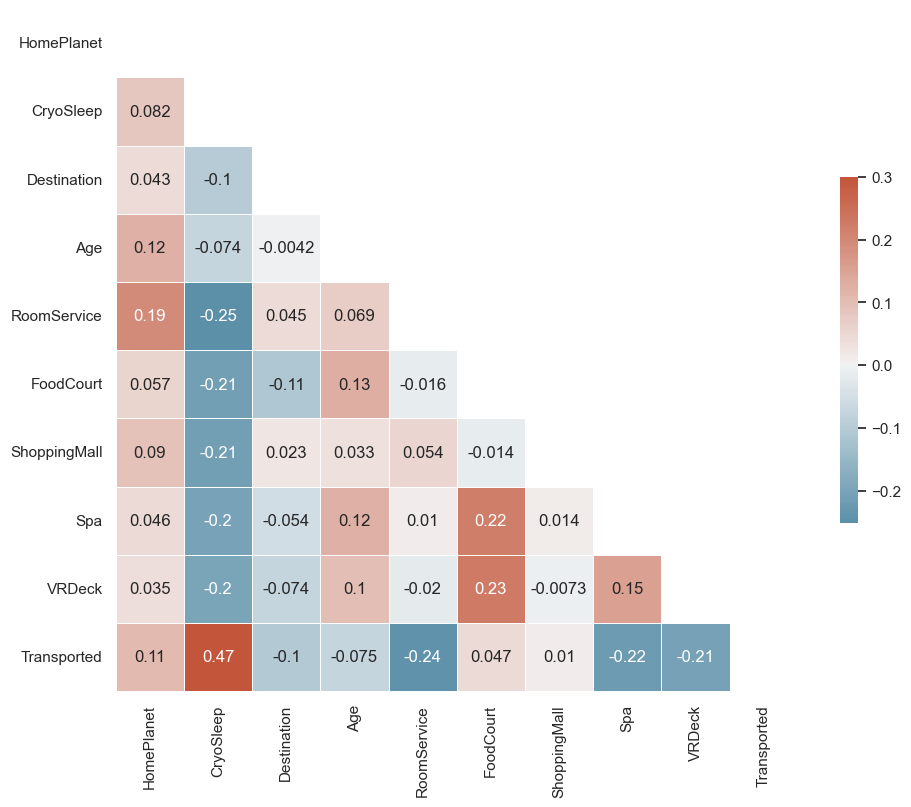

In [10]:
# checkout correlation
import seaborn as sns
sns.set_theme(style="white")

numerical_colums = ['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Transported']

# Compute the correlation matrix
corr = labeled_df[numerical_colums].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
pass

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


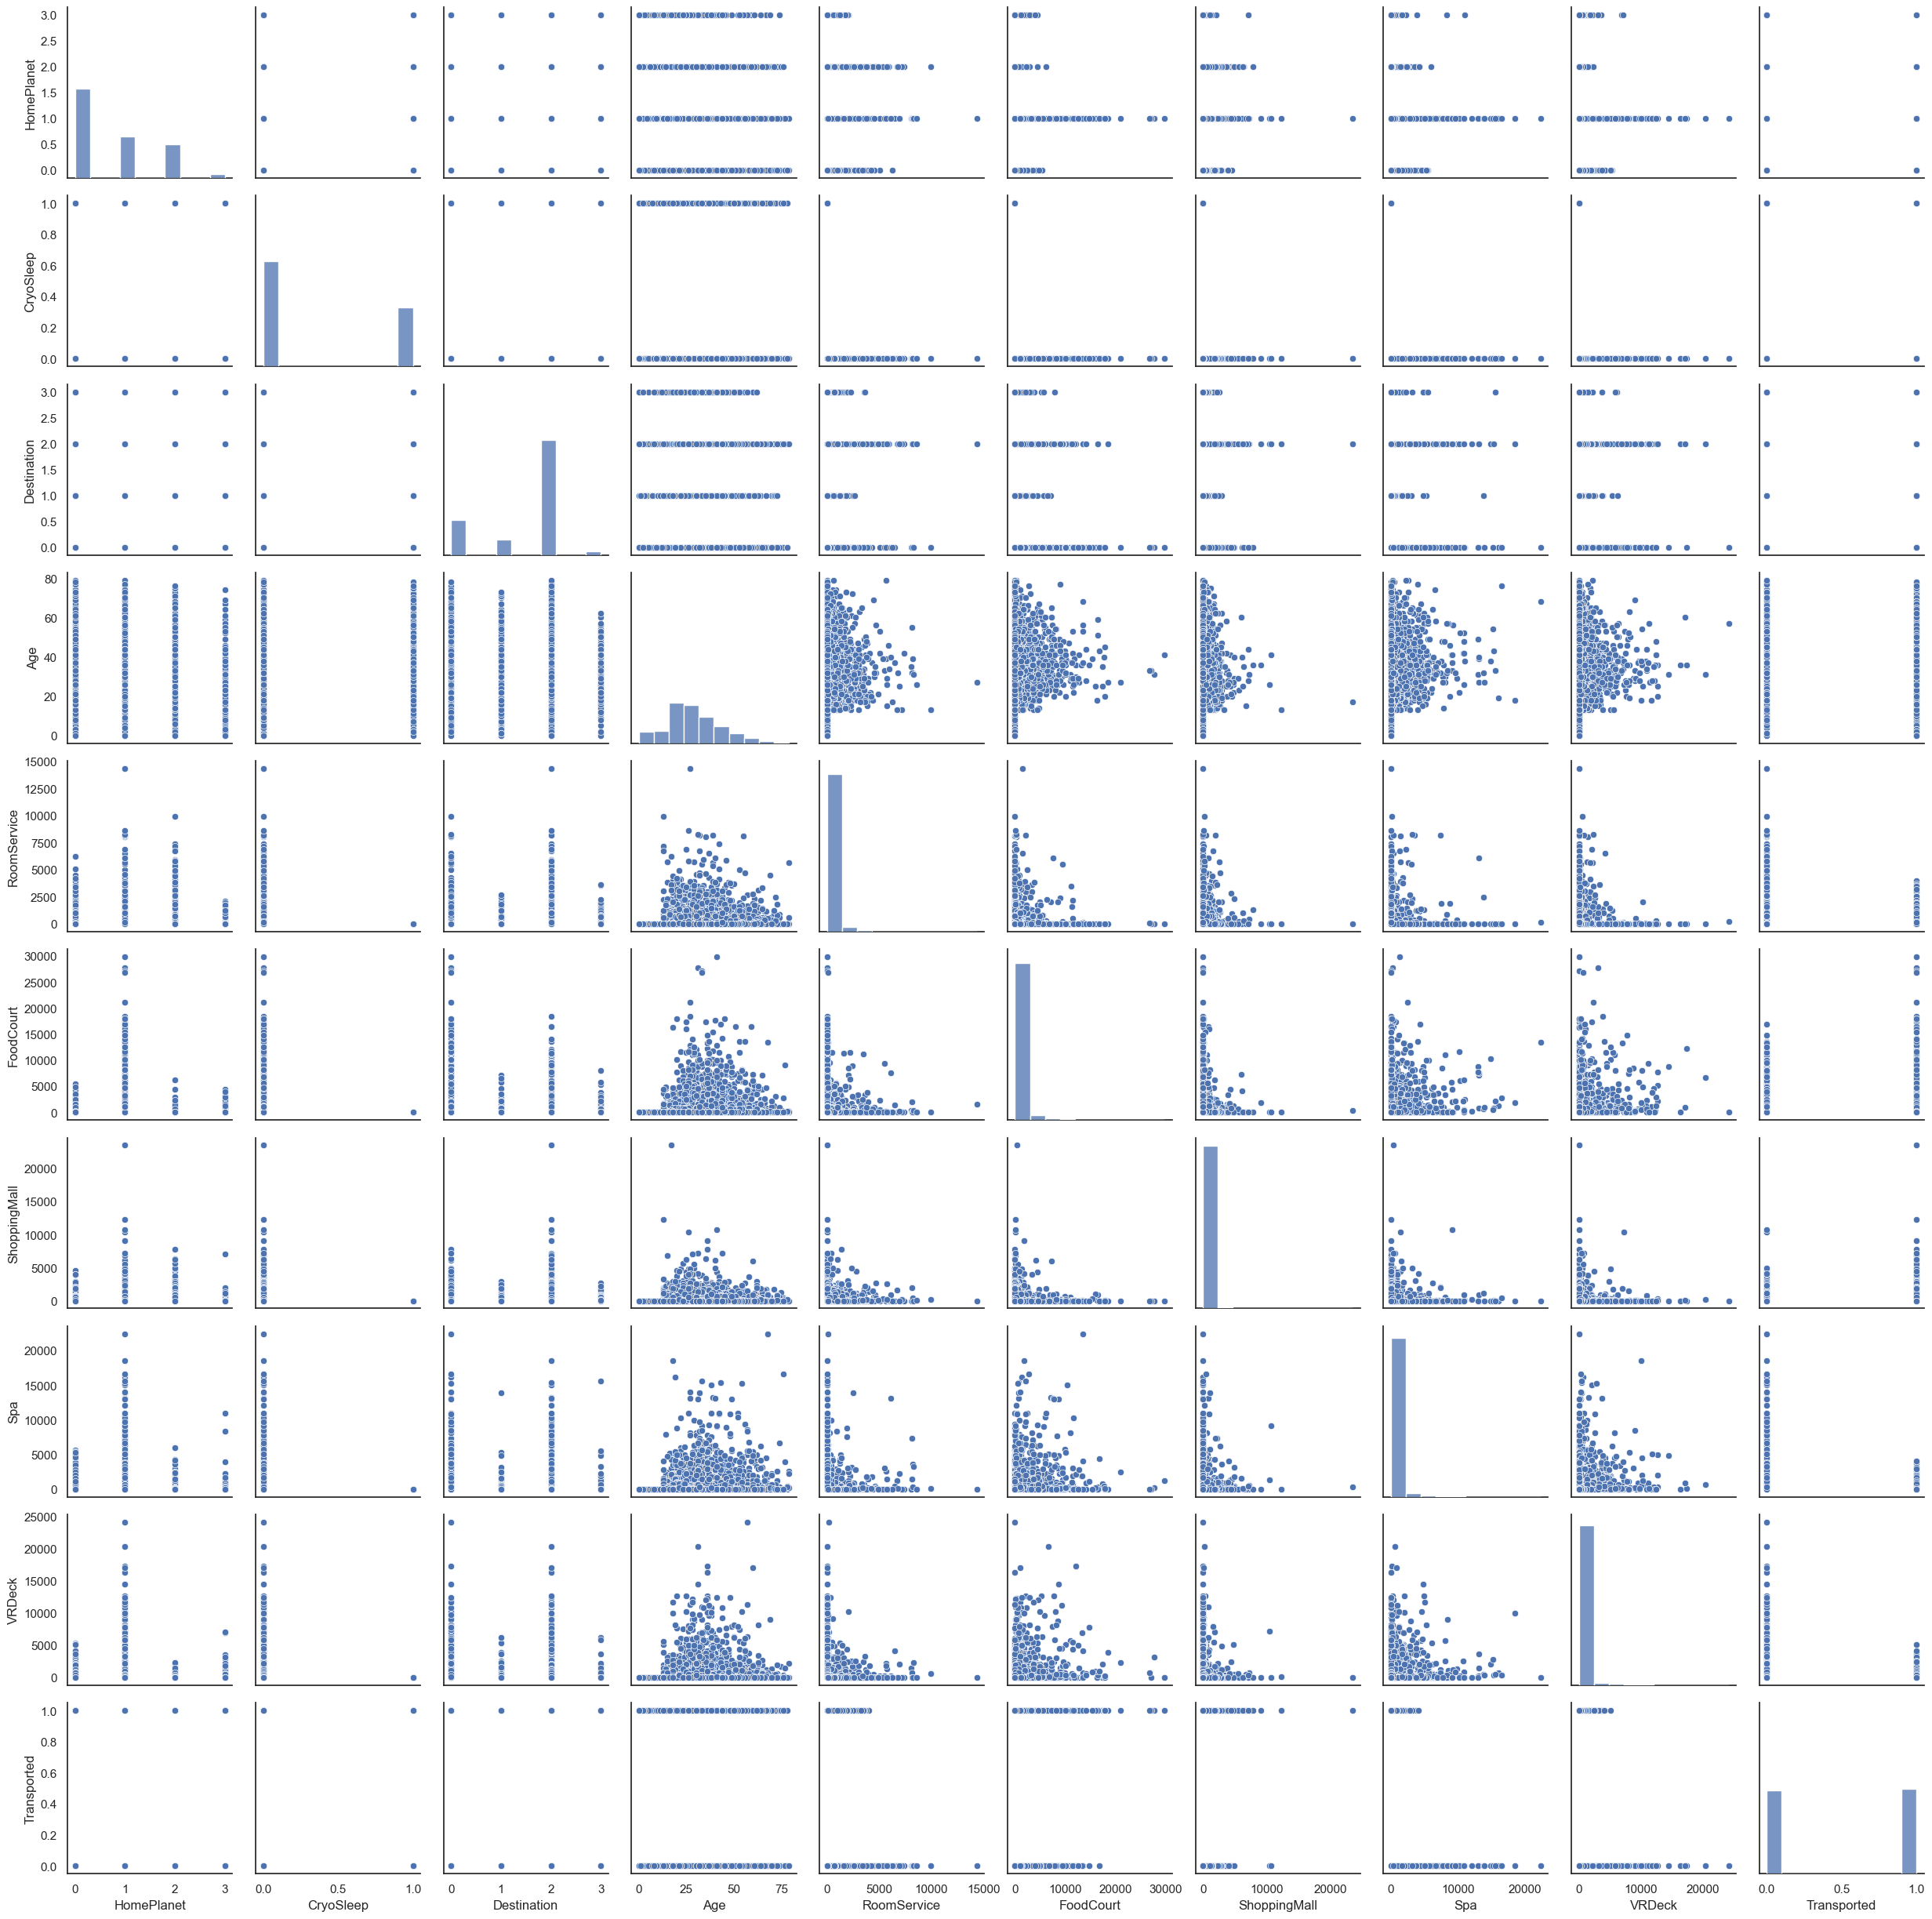

In [11]:
g = sns.PairGrid(labeled_df[numerical_colums], dropna=True)
g.map_diag(sns.histplot, bins=10)
g.map_offdiag(sns.scatterplot)
plt.show()

In [12]:
print(d['HomePlanet'].classes_)
print(d['Destination'].classes_)

['Earth' 'Europa' 'Mars' nan]
['55 Cancri e' 'PSO J318.5-22' 'TRAPPIST-1e' nan]


Note: <br>
['RoomService', 'FoodCourt','ShoppingMall', 'Spa', 'VRDeck'] is right skewed. We will take a transformation needed<br>
['Home planent'] <- Most people comes from earth, then Europa and Mars<br>
['Destination'] <- The most destination is TRAPPIST-1e<br>
['Age'] <- most people are above 20 <br>

In [13]:
# apply log to the data
log_columns = ['RoomService', 'FoodCourt','ShoppingMall', 'Spa', 'VRDeck']
labeled_df[log_columns] = labeled_df[log_columns].applymap(lambda x: np.log(x+1))

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


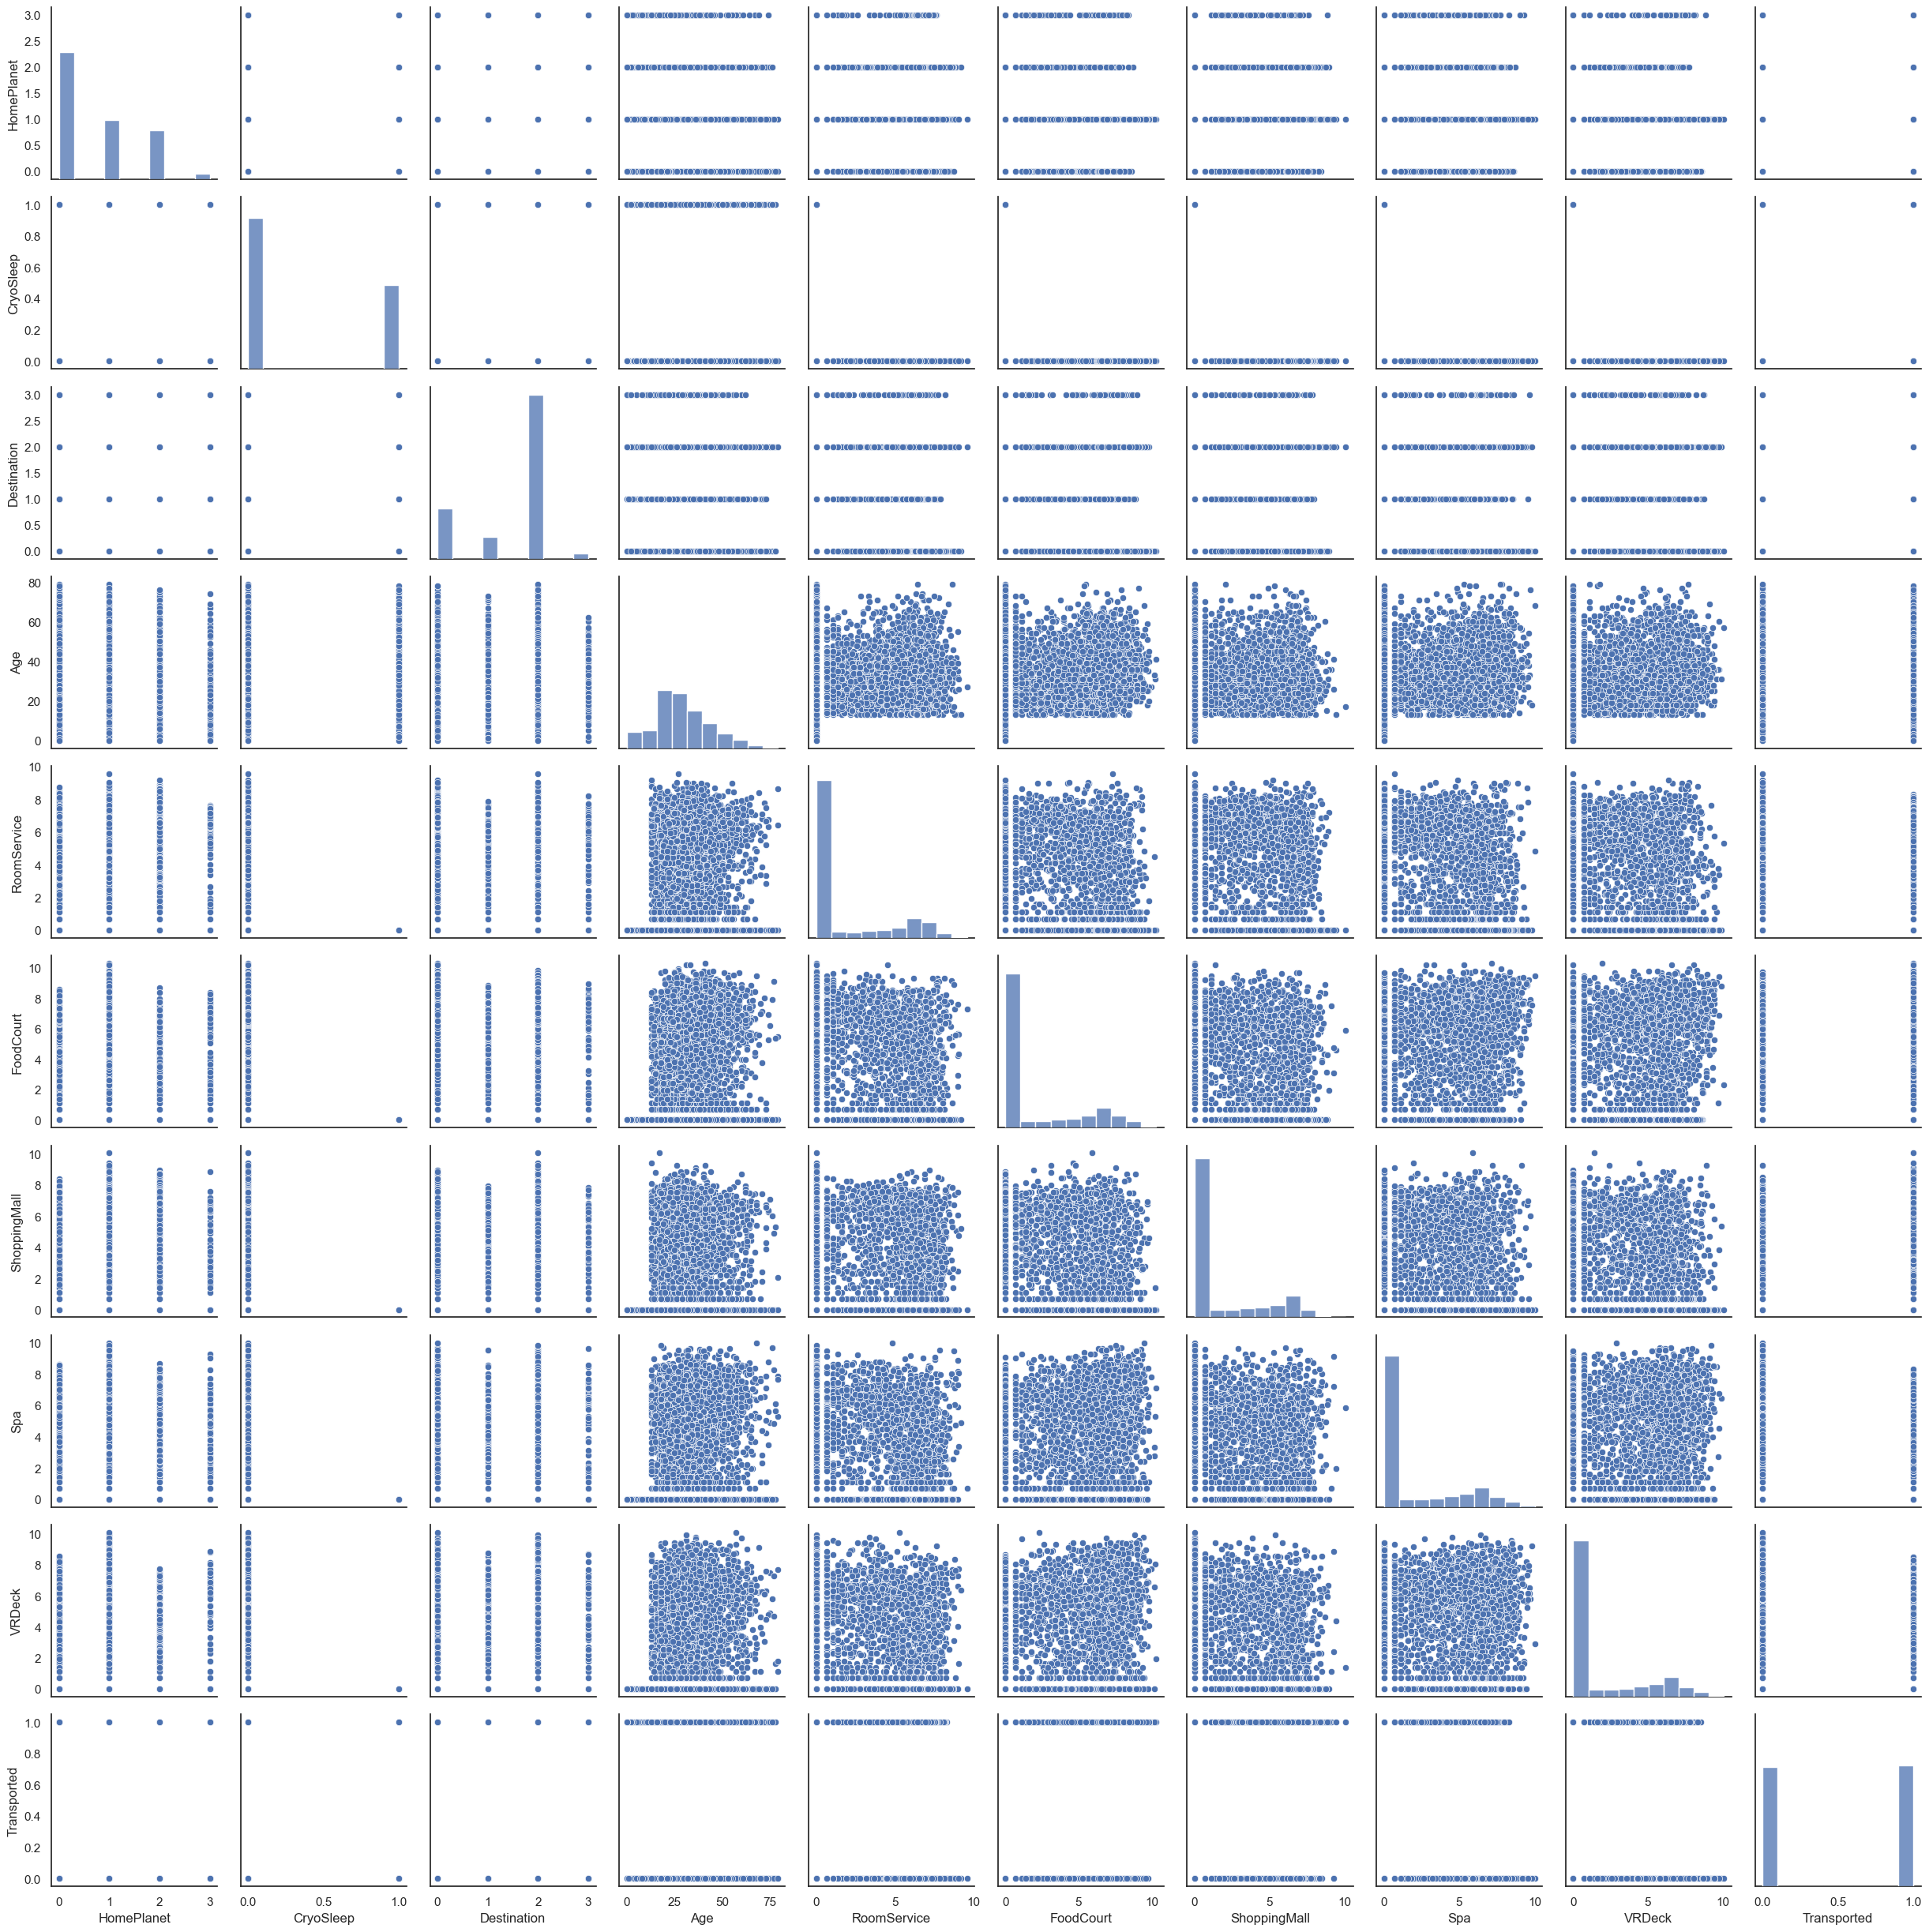

In [14]:
g = sns.PairGrid(labeled_df[numerical_colums], dropna=True)
g.map_diag(sns.histplot, bins=10)
g.map_offdiag(sns.scatterplot)
plt.show()